In [ ]:
"""
    File : stripplotParallelEvolutionTumour.ipynb
    Plot : stripplot of the distances from regions harbouring paralell events with limited expansion to tumour margin in RCC tumours
    Inputs : 
        SourceData_Fig4a.xlsx
        
    Note that the positions of data points may slightly differ in different
    iterations of Seaborn stripplot function call
"""

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
path_to_all_source_data = "../Source data for figures"

In [7]:
def plot_data(
    single_region_events,
    single_region_events_mean_d2margin
):
    def config_font_size(figsize):
        params = {'legend.fontsize': 6,
                  'figure.figsize': figsize,
                 'axes.labelsize': 8,
                 'axes.titlesize': 8,
                 'xtick.labelsize':6,
                 'ytick.labelsize':6,
                 'pdf.fonttype':42}
        plt.rcParams.update(params)

    fig = plt.figure(dpi=300)
    ax = fig.add_axes([0.2,0.2,0.75,0.75])

    config_font_size(figsize = (2.75,3))
    
    order_tumours = single_region_events_mean_d2margin.TumourK.values.tolist()

    sns.stripplot(
        data=single_region_events,
        y='TumourK',
        x='D2Margin',
        orient='h',
        ax=ax,
        size=2,
        order=order_tumours,
        zorder=2
    )

    ax.scatter(
        single_region_events_mean_d2margin.D2MarginMean,
        single_region_events_mean_d2margin.TumourK,  
        s = 0.5, marker = '_', c = 'k', zorder = 3
    )

    ax.set_xlim([0,35])
    ax.axvline(x = 10, c = 'grey', lw = 0.5, zorder = 1, ls = '--')

    ax.tick_params(axis='y', which='major', labelsize=3.5)

    ax.set_xlabel('Distance to margin (mm)')
    ax.set_ylabel('Tumour ID')

    plt.show()

# Figure 4a

In [4]:
path_to_excelfile = os.path.join(
    path_to_all_source_data,
    "Source_Data_Figure_4",
    "SourceData_Fig4a.xlsx"
)

In [5]:
excelfile = pd.ExcelFile(path_to_excelfile)
excelfile.sheet_names

['SourceDataFig4aInput1', 'SourceDataFig4aInput2']

In [6]:
single_region_parallel_events = pd.read_excel(
    excelfile, 
    sheet_name='SourceDataFig4aInput1'
)
single_region_parallel_events_mean_d2margin = pd.read_excel(
    excelfile, 
    sheet_name='SourceDataFig4aInput2'
)

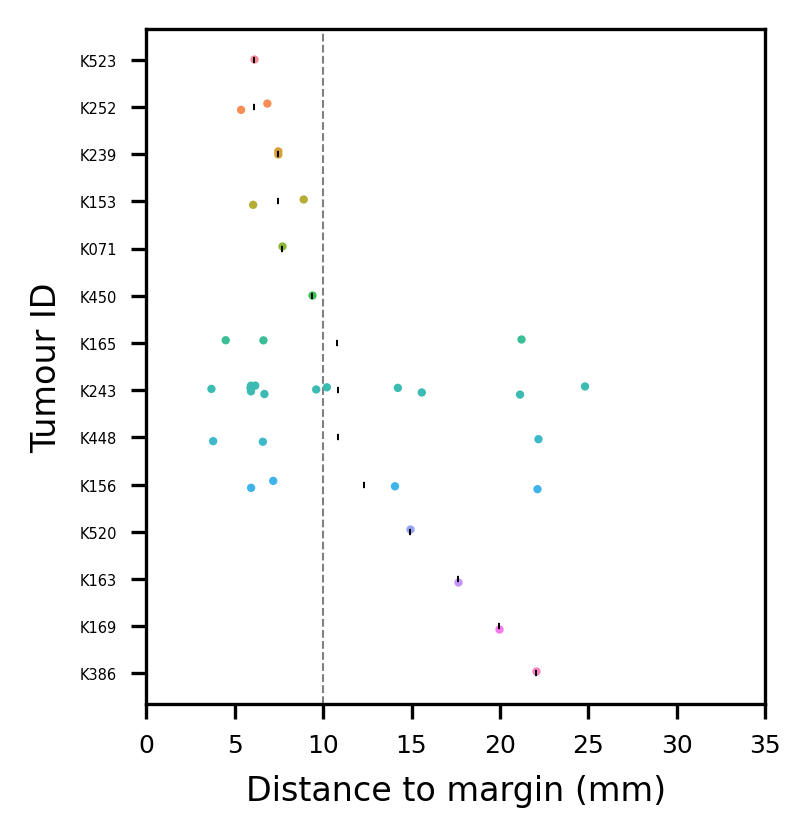

In [10]:
plot_data(
    single_region_parallel_events,
    single_region_parallel_events_mean_d2margin
)